              Housekeeping    Travel  Supermarket   Netflix
Housekeeping      1.000000  0.613383     0.764831 -0.156600
Travel            0.613383  1.000000     0.963958 -0.614045
Supermarket       0.764831  0.963958     1.000000 -0.447709
Netflix          -0.156600 -0.614045    -0.447709  1.000000


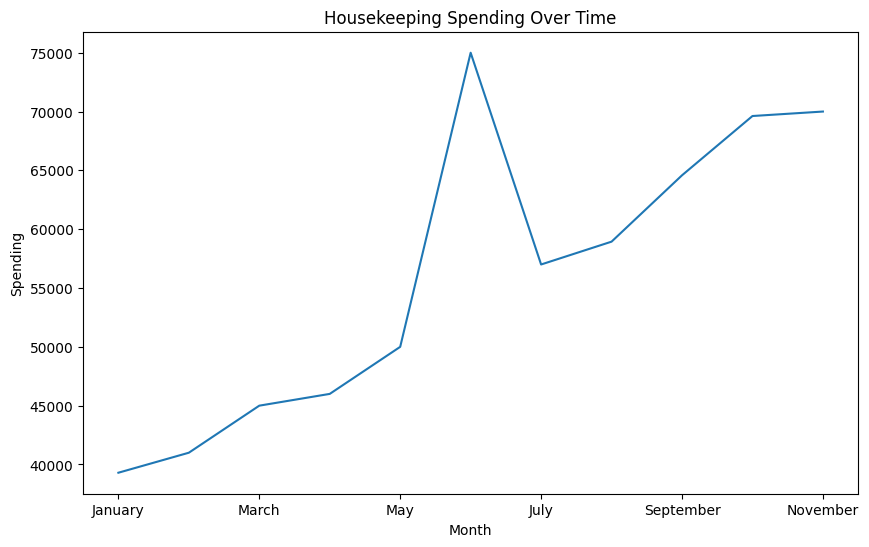

In [1]:
!pip install pandas matplotlib openpyxl scikit-learn numpy statsmodels
import pandas as pd

data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November'],
    'Housekeeping': [39300, 41000, 45000, 46000, 50000, 75000, 57000, 58941, 64581, 69620, 70000],
    'Travel': [1500, 1500, 1500, 1500, 1500, 1500, 1500, 3000, 3000, 3000, 3000],
    'Supermarket': [25000, 25000, 25000, 25000, 25000, 30000, 30000, 40000, 40000, 40000, 40000],
    'Netflix': [839, 839, 890, 890, 890, 890, 1100, 799, 799, 799, 799]
}

df = pd.DataFrame(data)

df.set_index('Month', inplace=True)
correlations = df[['Housekeeping', 'Travel', 'Supermarket', 'Netflix']].corr()
print(correlations)
import matplotlib.pyplot as plt

df['Housekeeping'].plot(kind='line', figsize=(10, 6))
plt.title('Housekeeping Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Spending')
plt.show()

In [2]:

import statsmodels.api as sm

# Prepare the data
X = df[['Travel', 'Supermarket', 'Netflix']]  # independent variables
y = df['Housekeeping']  # dependent variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Housekeeping   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     13.86
Date:                Mon, 15 Jul 2024   Prob (F-statistic):            0.00249
Time:                        20:36:46   Log-Likelihood:                -108.28
No. Observations:                  11   AIC:                             224.6
Df Residuals:                       7   BIC:                             226.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.954e+04   2.82e+04      0.693      

/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [3]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November'],
    'Housekeeping': [39300, 41000, 45000, 46000, 50000, 75000, 57000, 58941, 64581, 69620, 70000],
    'Travel': [1500, 1500, 1500, 1500, 1500, 1500, 1500, 3000, 3000, 3000, 3000],
    'Supermarket': [25000, 25000, 25000, 25000, 25000, 30000, 30000, 40000, 40000, 40000, 40000],
    'Netflix': [839, 839, 890, 890, 890, 890, 1100, 799, 799, 799, 799]
}

df = pd.DataFrame(data)

df.set_index('Month', inplace=True)

# Define features and target
X = df[['Travel', 'Supermarket', 'Netflix']]  # Features
y = df['Housekeeping']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print('Mean squared error (MSE): %.2f'
      % metrics.mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, y_pred))

Coefficients: 
 [ 48.22057516  -2.94117647 117.64705882]
Mean squared error (MSE): 617607249.33
Variance score: -1.50


In [4]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df[['Travel', 'Supermarket', 'Netflix']]  # independent variables
y = df['Housekeeping']  # dependent variable

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# L1 Regularization (Lasso)
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_scaled, y)

print("L1 (Lasso) Coefficients:")
print("Travel:", lasso_model.coef_[0])
print("Supermarket:", lasso_model.coef_[1])
print("Netflix:", lasso_model.coef_[2])

# L2 Regularization (Ridge)
ridge_model = Ridge(alpha=0.1)  # alpha is the regularization strength
ridge_model.fit(X_scaled, y)

print("\nL2 (Ridge) Coefficients:")
print("Travel:", ridge_model.coef_[0])
print("Supermarket:", ridge_model.coef_[1])
print("Netflix:", ridge_model.coef_[2])

L1 (Lasso) Coefficients:
Travel: -33570.42174992147
Supermarket: 39365.68194500922
Netflix: -4870.049115760278

L2 (Ridge) Coefficients:
Travel: -19901.18378037983
Supermarket: 27285.113236026176
Netflix: -1868.2165956744432


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Preparing Data
X = df[['Travel', 'Supermarket', 'Netflix']]  # Features
y = df['Housekeeping']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)

Mean Squared Error: 146449194.72970638
       Feature  Importance
1  Supermarket    0.710577
0       Travel    0.169175
2      Netflix    0.120248
